In [370]:
import scipy.io.wavfile
import scipy.signal
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["figure.dpi"] = 120

[]

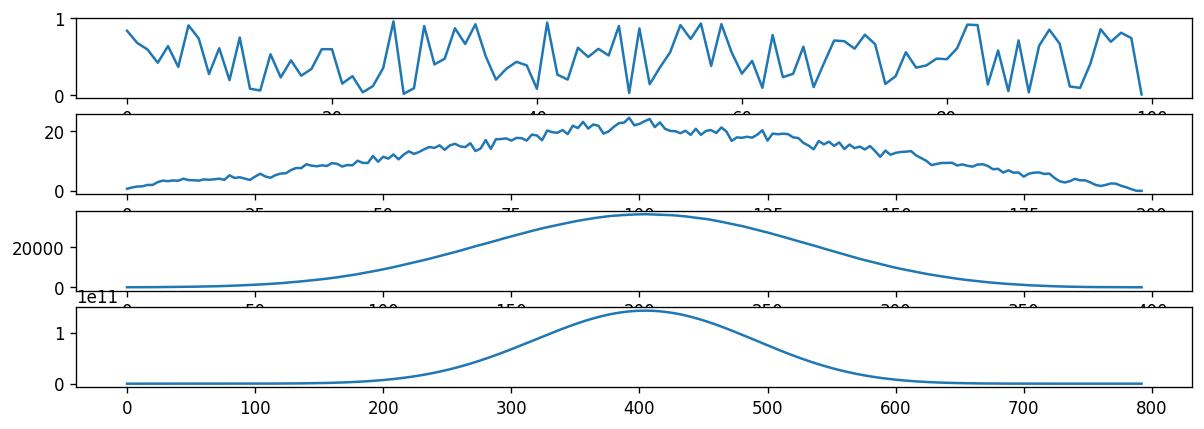

In [371]:
# 1

N = 100
x = np.random.rand(N)

fig, axs = plt.subplots(4, 1, figsize=(12, 4))
for ax in axs:
    ax.plot(x)
    x = np.convolve(x, x)


plt.plot()

In [372]:
# 2
def convolution(p, q, method):
    result_degree = p.order + q.order + 1
    if method == "direct":
        result = np.zeros(result_degree)
        for i in range(p.order + 1):
            for j in range(q.order + 1):
                result[i + j] += p.c[i] * q.c[j]
    elif method == "fft":
        p_fft = np.fft.fft(p.coefficients, result_degree)
        q_fft = np.fft.fft(q.coefficients, result_degree)
        result = np.fft.ifft(p_fft * q_fft).real.round()
    return np.poly1d(result)


def generate_random_polynomial(maxOrder):
    order = np.random.randint(1, maxOrder + 1)
    coefficients = np.random.randint(-10, 10, order)
    coefficients[0] = np.random.randint(1, 10)
    return np.poly1d(coefficients)


N = 7
p = generate_random_polynomial(N)
q = generate_random_polynomial(N)
print("p(x):\n", p)
print("q(x):\n", q)
print("=====================================")
direct, fft = [convolution(p, q, method) for method in ["direct", "fft"]]
print("direct:\n", direct)
print("fft:\n", fft)

print(
    np.allclose(direct, fft),
)

p(x):
    4     3     2
3 x + 1 x - 9 x - 6 x + 7
q(x):
    5     4     3     2
2 x + 1 x + 1 x + 7 x - 2 x + 2
direct:
    9     8      7     6      4      3      2
6 x + 5 x - 14 x + 1 x - 58 x - 15 x + 43 x - 26 x + 14
fft:
    9     8      7     6      4      3      2
6 x + 5 x - 14 x + 1 x - 58 x - 15 x + 43 x - 26 x + 14
True


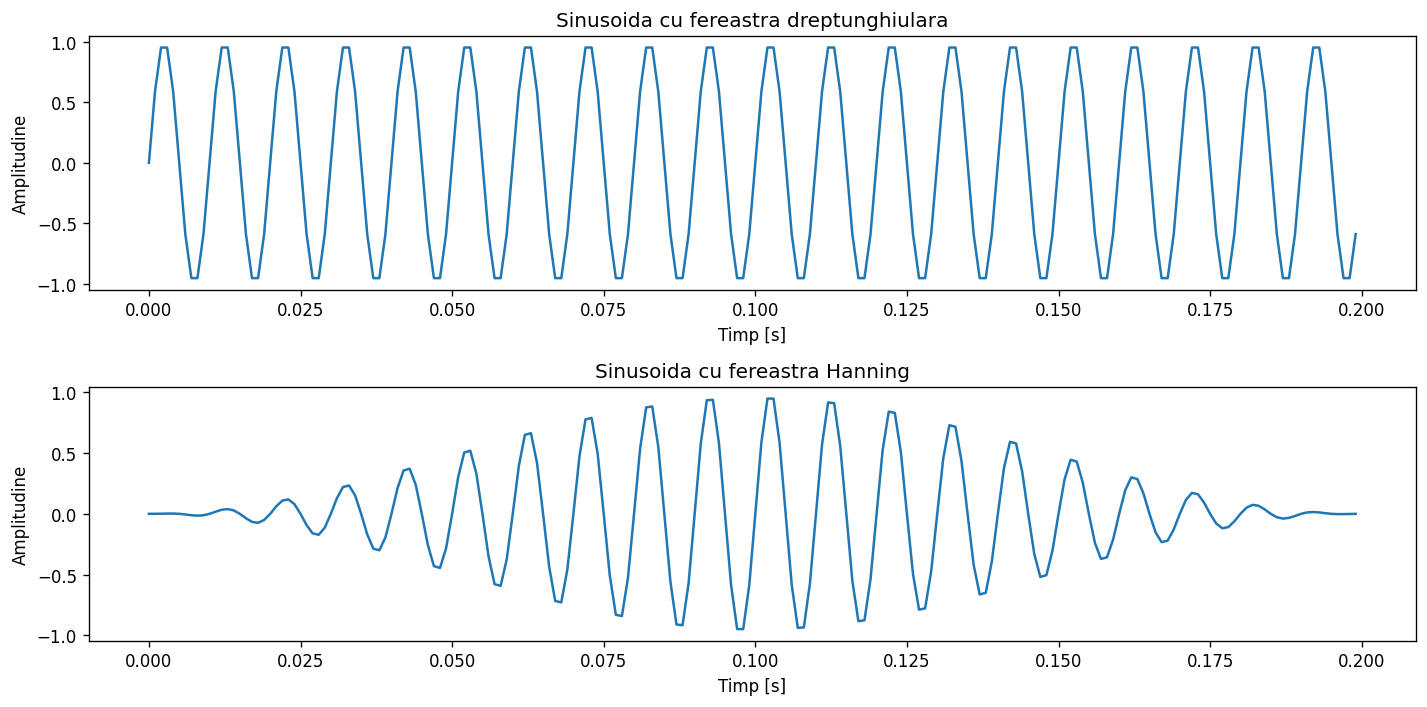

In [373]:
# 3
f = 100
A = 1
phi = 0

Nw = 200


def hanning_window(Nw):
    return 0.5 * np.abs(1 - np.cos(2 * np.pi * np.arange(Nw) / Nw))


rect_window = np.ones(Nw)
hann_window = hanning_window(Nw)

t = np.linspace(0, 1, 1000, endpoint=False)
sinusoida = A * np.sin(2 * np.pi * f * t + phi)

rect_sinusoida = sinusoida[:Nw] * rect_window
hann_sinusoida = sinusoida[:Nw] * hann_window

fig, axs = plt.subplots(2, 1, figsize=(12, 6))

axs[0].plot(t[:Nw], rect_sinusoida, label="Sinusoida cu fereastra dreptunghiulara")
axs[0].set_title("Sinusoida cu fereastra dreptunghiulara")
axs[0].set_xlabel("Timp [s]")
axs[0].set_ylabel("Amplitudine")

axs[1].plot(t[:Nw], hann_sinusoida, label="Sinusoida cu fereastra Hanning")
axs[1].set_title("Sinusoida cu fereastra Hanning")
axs[1].set_xlabel("Timp [s]")
axs[1].set_ylabel("Amplitudine")

plt.tight_layout()
plt.show()

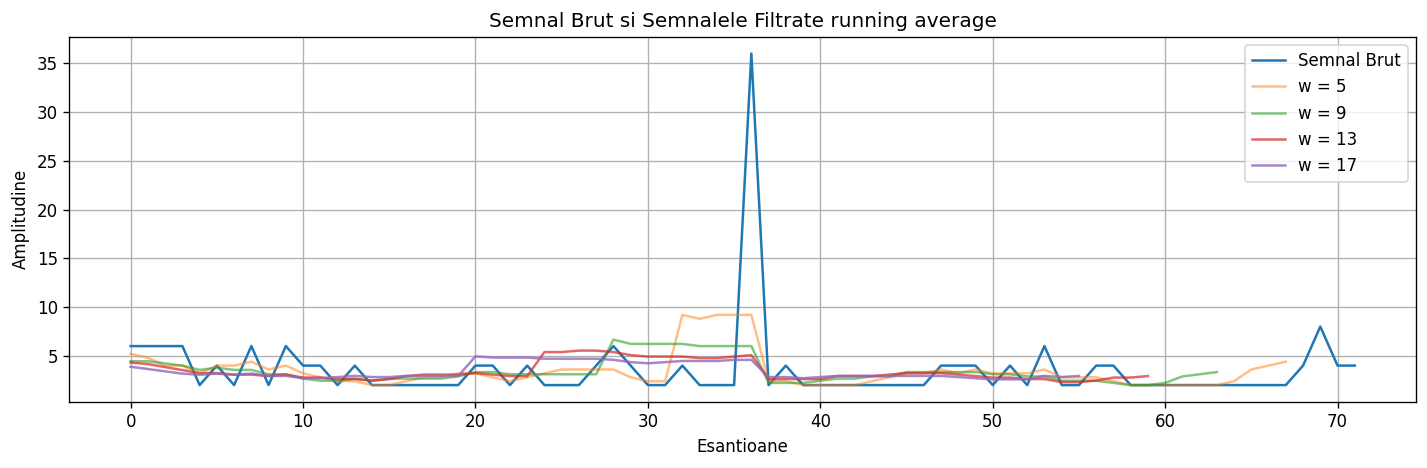

In [374]:
# 4 a
start_index = 301
x = np.genfromtxt("Train.csv", delimiter=",", skip_header=1)
x = x[start_index : start_index + 24 * 3][:, 2]

plt.figure(figsize=(12, 4))
plt.plot(x, label="Semnal Brut", alpha=1)
plt.title("Semnal Brut si Semnalele Filtrate running average")
plt.xlabel("Esantioane")
plt.ylabel("Amplitudine")
plt.grid(True)

# 4 b
window_sizes = [5, 9, 13, 17]
opacities = [0.5, 0.6, 0.7, 0.8]

for w, opacity in zip(window_sizes, opacities):
    filtered_signal = np.convolve(x, np.ones(w) / w, "valid")
    plt.plot(filtered_signal, label=f"w = {w}", alpha=opacity)

plt.legend()
plt.tight_layout()
plt.show()

In [375]:
# c
f_sample = 1 / 3600
# filtram frecvente mai mari de 12h
Wn = f_sample / 12
f_nyquist = f_sample / 2
Wn_normalized = Wn / f_nyquist
print("Frecventa in Hz:", Wn)
print("Frecventa normalizata:", Wn_normalized)

Frecventa in Hz: 2.3148148148148147e-05
Frecventa normalizata: 0.16666666666666666


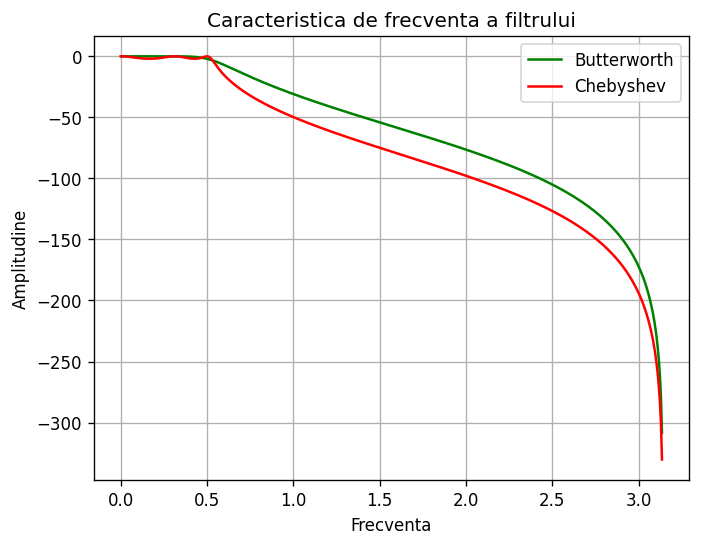

In [376]:
# d
order = 5
rp = 2
# echivalente
# bb, ab = scipy.signal.butter(order, Wn, fs=f_sample)
# bc, ac= scipy.signal.cheby1(order, rp, Wn, fs=f_sample)
bb, ab = scipy.signal.butter(order, Wn_normalized)
bc, ac = scipy.signal.cheby1(order, rp, Wn_normalized)

wb, hb = scipy.signal.freqz(bb, ab)
wc, hc = scipy.signal.freqz(bc, ac)

plt.plot(wb, 20 * np.log10(np.abs(hb)), label="Butterworth", color="green")
plt.plot(wc, 20 * np.log10(np.abs(hc)), label="Chebyshev", color="red")
plt.title("Caracteristica de frecventa a filtrului")
plt.xlabel("Frecventa")
plt.ylabel("Amplitudine")
plt.legend()
plt.grid(True)
plt.show()

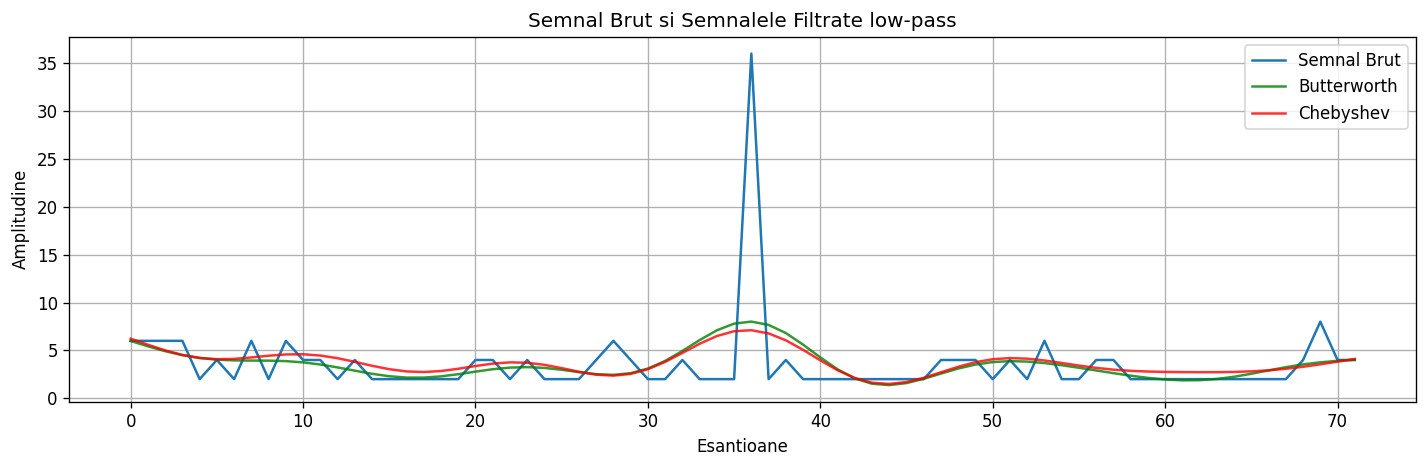

In [377]:
# e
x_butter = scipy.signal.filtfilt(bb, ab, x)
x_chevby = scipy.signal.filtfilt(bc, ac, x)


plt.figure(figsize=(12, 4))
plt.plot(x, label="Semnal Brut", alpha=1)
plt.plot(x_butter, label="Butterworth", alpha=0.8, color="green")
plt.plot(x_chevby, label="Chebyshev", alpha=0.8, color="red")
plt.title("Semnal Brut si Semnalele Filtrate low-pass")
plt.xlabel("Esantioane")
plt.ylabel("Amplitudine")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

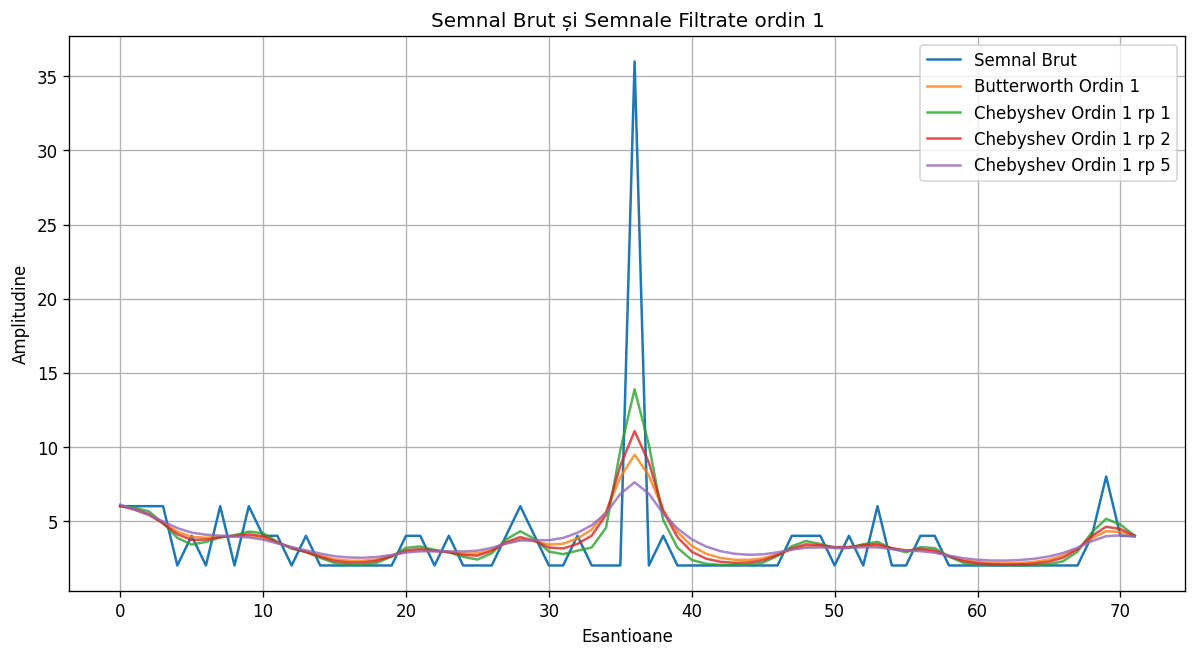

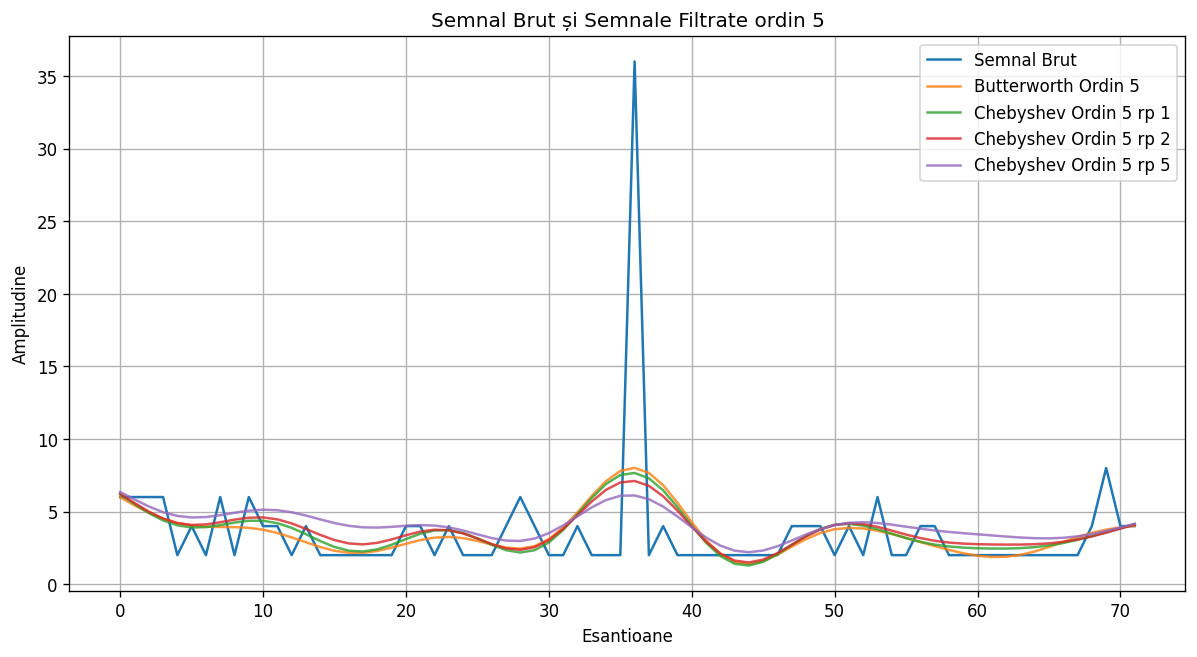

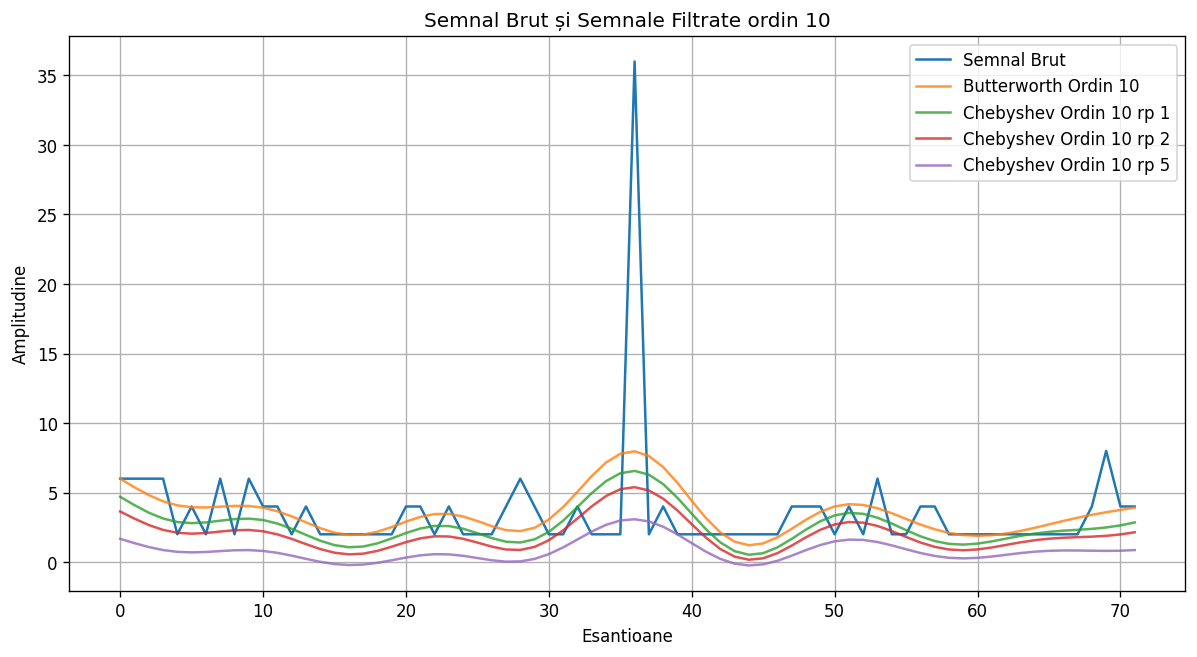

In [402]:
# f

orders = [1, 5, 10]
rps = [1, 2, 5]


for order in orders:
    plt.figure(figsize=(12, 6))
    plt.plot(x, label="Semnal Brut", alpha=1)
    bb, ab = scipy.signal.butter(order, Wn_normalized)
    x_butter = scipy.signal.filtfilt(bb, ab, x)
    plt.plot(x_butter, label="Butterworth Ordin " + str(order), alpha=0.8)

    for rp in rps:
        bc, ac = scipy.signal.cheby1(order, rp, Wn_normalized)
        x_chebyshev = scipy.signal.filtfilt(bc, ac, x)

        plt.plot(
            x_chebyshev,
            label="Chebyshev Ordin " + str(order) + " rp " + str(rp),
            alpha=0.8,
        )
    plt.title(f"Semnal Brut și Semnale Filtrate ordin {order}")
    plt.xlabel("Esantioane")
    plt.ylabel("Amplitudine")
    plt.legend()
    plt.grid(True)
    plt.show()